<a href="https://colab.research.google.com/github/shefi-S/Data-Mining/blob/main/Tugas_Data_Mining_180425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [87]:
gender=pd.read_csv('gender_classification_v7.csv')

In [88]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


Setiap baris dalam dataset mewakili ciri-ciri dan gender satu siswa, dan kolom-kolomnya adalah ciri-ciri fitur wajah tubuh siswa. Berikut adalah penjelasan dari setiap variabelnya:

long_hair: Nilai biner (1 atau 0) yang menunjukkan apakah individu memiliki rambut panjang (1) atau tidak (0).​

forehead_width_cm: Lebar dahi individu dalam sentimeter.​

forehead_height_cm: Tinggi dahi individu dalam sentimeter.​

nose_wide: Nilai biner yang menunjukkan apakah individu memiliki hidung lebar (1) atau tidak (0).​

nose_long: Nilai biner yang menunjukkan apakah individu memiliki hidung panjang (1) atau tidak (0).​

lips_thin: Nilai biner yang menunjukkan apakah individu memiliki bibir tipis (1) atau tidak (0).​

distance_nose_to_lip_long: Nilai biner yang menunjukkan apakah jarak antara hidung dan bibir individu panjang (1) atau tidak (0).​

gender: Label target yang menunjukkan jenis kelamin individu, dengan nilai "Male" atau "Female".

Dataset ini dirancang untuk membantu peneliti memahami bagaimana fitur-fitur wajah dapat digunakan dalam model machine learning untuk mengklasifikasikan jenis kelamin. Ini juga memberikan kesempatan untuk mengeksplorasi teknik praproses data, seleksi fitur, dan evaluasi model dalam konteks klasifikasi biner.


In [133]:
gender.tail(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_encoded
4996,1,13.6,5.1,0,0,0,0,Female,0
4997,1,11.9,5.4,0,0,0,0,Female,0
4998,1,12.9,5.7,0,0,0,0,Female,0
4999,1,13.2,6.2,0,0,0,0,Female,0
5000,1,15.4,5.4,1,1,1,1,Male,1


Dataset ini memiliki total pengamatan 5001 siswa

In [90]:
count_values = gender['gender'].value_counts()
count_values

,count
gender,
Female,2501
Male,2500


Dalam data ini memiliki jumlah data female (perempuan) lebih banyak daripada jumlah male (laki-laki).

In [91]:
#melihat statistika deskriptif
gender.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [92]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [93]:
gender.isnull()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


In [94]:
np.sum(gender.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [95]:
#mengetahui jumlah missing value di seluruh dataset
gender.isnull().sum().sum()

np.int64(0)

didapatkan bahwa data tidak memiliki missing sama sekali, sehingga dalam proses preprocessing ini tidak melalui proses handling missing value sama sekali.

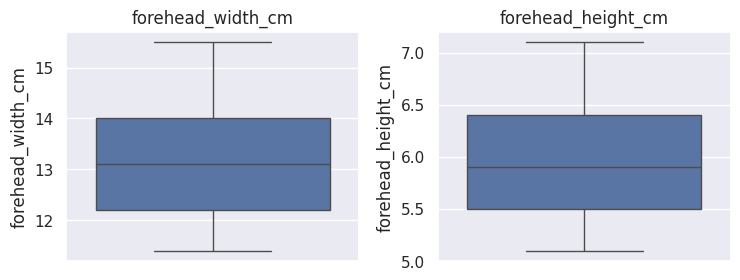

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['forehead_width_cm', 'forehead_height_cm']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=gender[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [97]:
# Kolom numerik yang ingin dicek outliernya
num_cols = ['forehead_width_cm', 'forehead_height_cm'] # Only include numerical columns

def detect_outliers_iqr(gender, column):
    Q1 = gender[column].quantile(0.25)  # Kuartil 1
    Q3 = gender[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return gender[(gender[column] < lower_bound) | (gender[column] > upper_bound)]

#Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(gender, col)
    print(f"{col}: {len(outliers)} outliers")

forehead_width_cm: 0 outliers
forehead_height_cm: 0 outliers


Dalam data gender ini didapatkan bahwa tidak ada outliers yang perlu ditangani, sehingga penangangan outliers tidak dilakukan dalam proses preprocessing ini.

In [114]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan DataFrame Anda bernama 'gender'
le = LabelEncoder()
gender['gender_encoded'] = le.fit_transform(gender['gender'])

# Menampilkan DataFrame yang telah di-encode
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_encoded
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0


mengubah kolom gender yang merupakan data kategorik yang berupa huruf menjadi data kategorik yang berupa kategorik numerik menggunakan One-Hot Encoding (OHE) karena kategori dapat berupa kolom biner (0/1). Digunakan juga karena jumlah kategori tidak terlalu banyak (menghindari dimensionalitas tinggi) hal ini akan menambah dimensi kolom data.

In [99]:
# Menghitung rata-rata berdasarkan nilai 'gender'
mean_by_gender = gender.groupby('gender').mean()

# Menghitung rata-rata berdasarkan nilai 'gender'
mean_by_gender = gender.groupby('gender').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'gender'
print(mean_by_gender)
print(mean_by_gender)

        long_hair  forehead_width_cm  forehead_height_cm  nose_wide  \
gender                                                                
Female   0.873251          12.811675            5.796321   0.114754   
Male     0.866000          13.551440            6.096360   0.873200   

        nose_long  lips_thin  distance_nose_to_lip_long  
gender                                                   
Female   0.135946   0.121551                   0.121551  
Male     0.880000   0.864800                   0.876400  
        long_hair  forehead_width_cm  forehead_height_cm  nose_wide  \
gender                                                                
Female   0.873251          12.811675            5.796321   0.114754   
Male     0.866000          13.551440            6.096360   0.873200   

        nose_long  lips_thin  distance_nose_to_lip_long  
gender                                                   
Female   0.135946   0.121551                   0.121551  
Male     0.880000   0.86

In [121]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'gender'

# Group data by 'gender' and calculate mean and standard deviation for numerical columns
mean_std_table = gender.groupby('gender').agg(['mean', 'std'])

# Display the table
print(mean_std_table)

       long_hair           forehead_width_cm           forehead_height_cm  \
            mean       std              mean       std               mean   
gender                                                                      
Female  0.873251  0.332758         12.811675  0.876703           5.796321   
Male    0.866000  0.340720         13.551440  1.187325           6.096360   

                 nose_wide           nose_long           lips_thin            \
             std      mean       std      mean       std      mean       std   
gender                                                                         
Female  0.430677  0.114754  0.318789  0.135946  0.342799  0.121551  0.326832   
Male    0.596306  0.873200  0.332815  0.880000  0.325027  0.864800  0.342005   

       distance_nose_to_lip_long           gender_encoded       
                            mean       std           mean  std  
gender                                                          
Female            

Telah didapatkan data rata-rata dan simpangan baku dari masing-masing parameter.

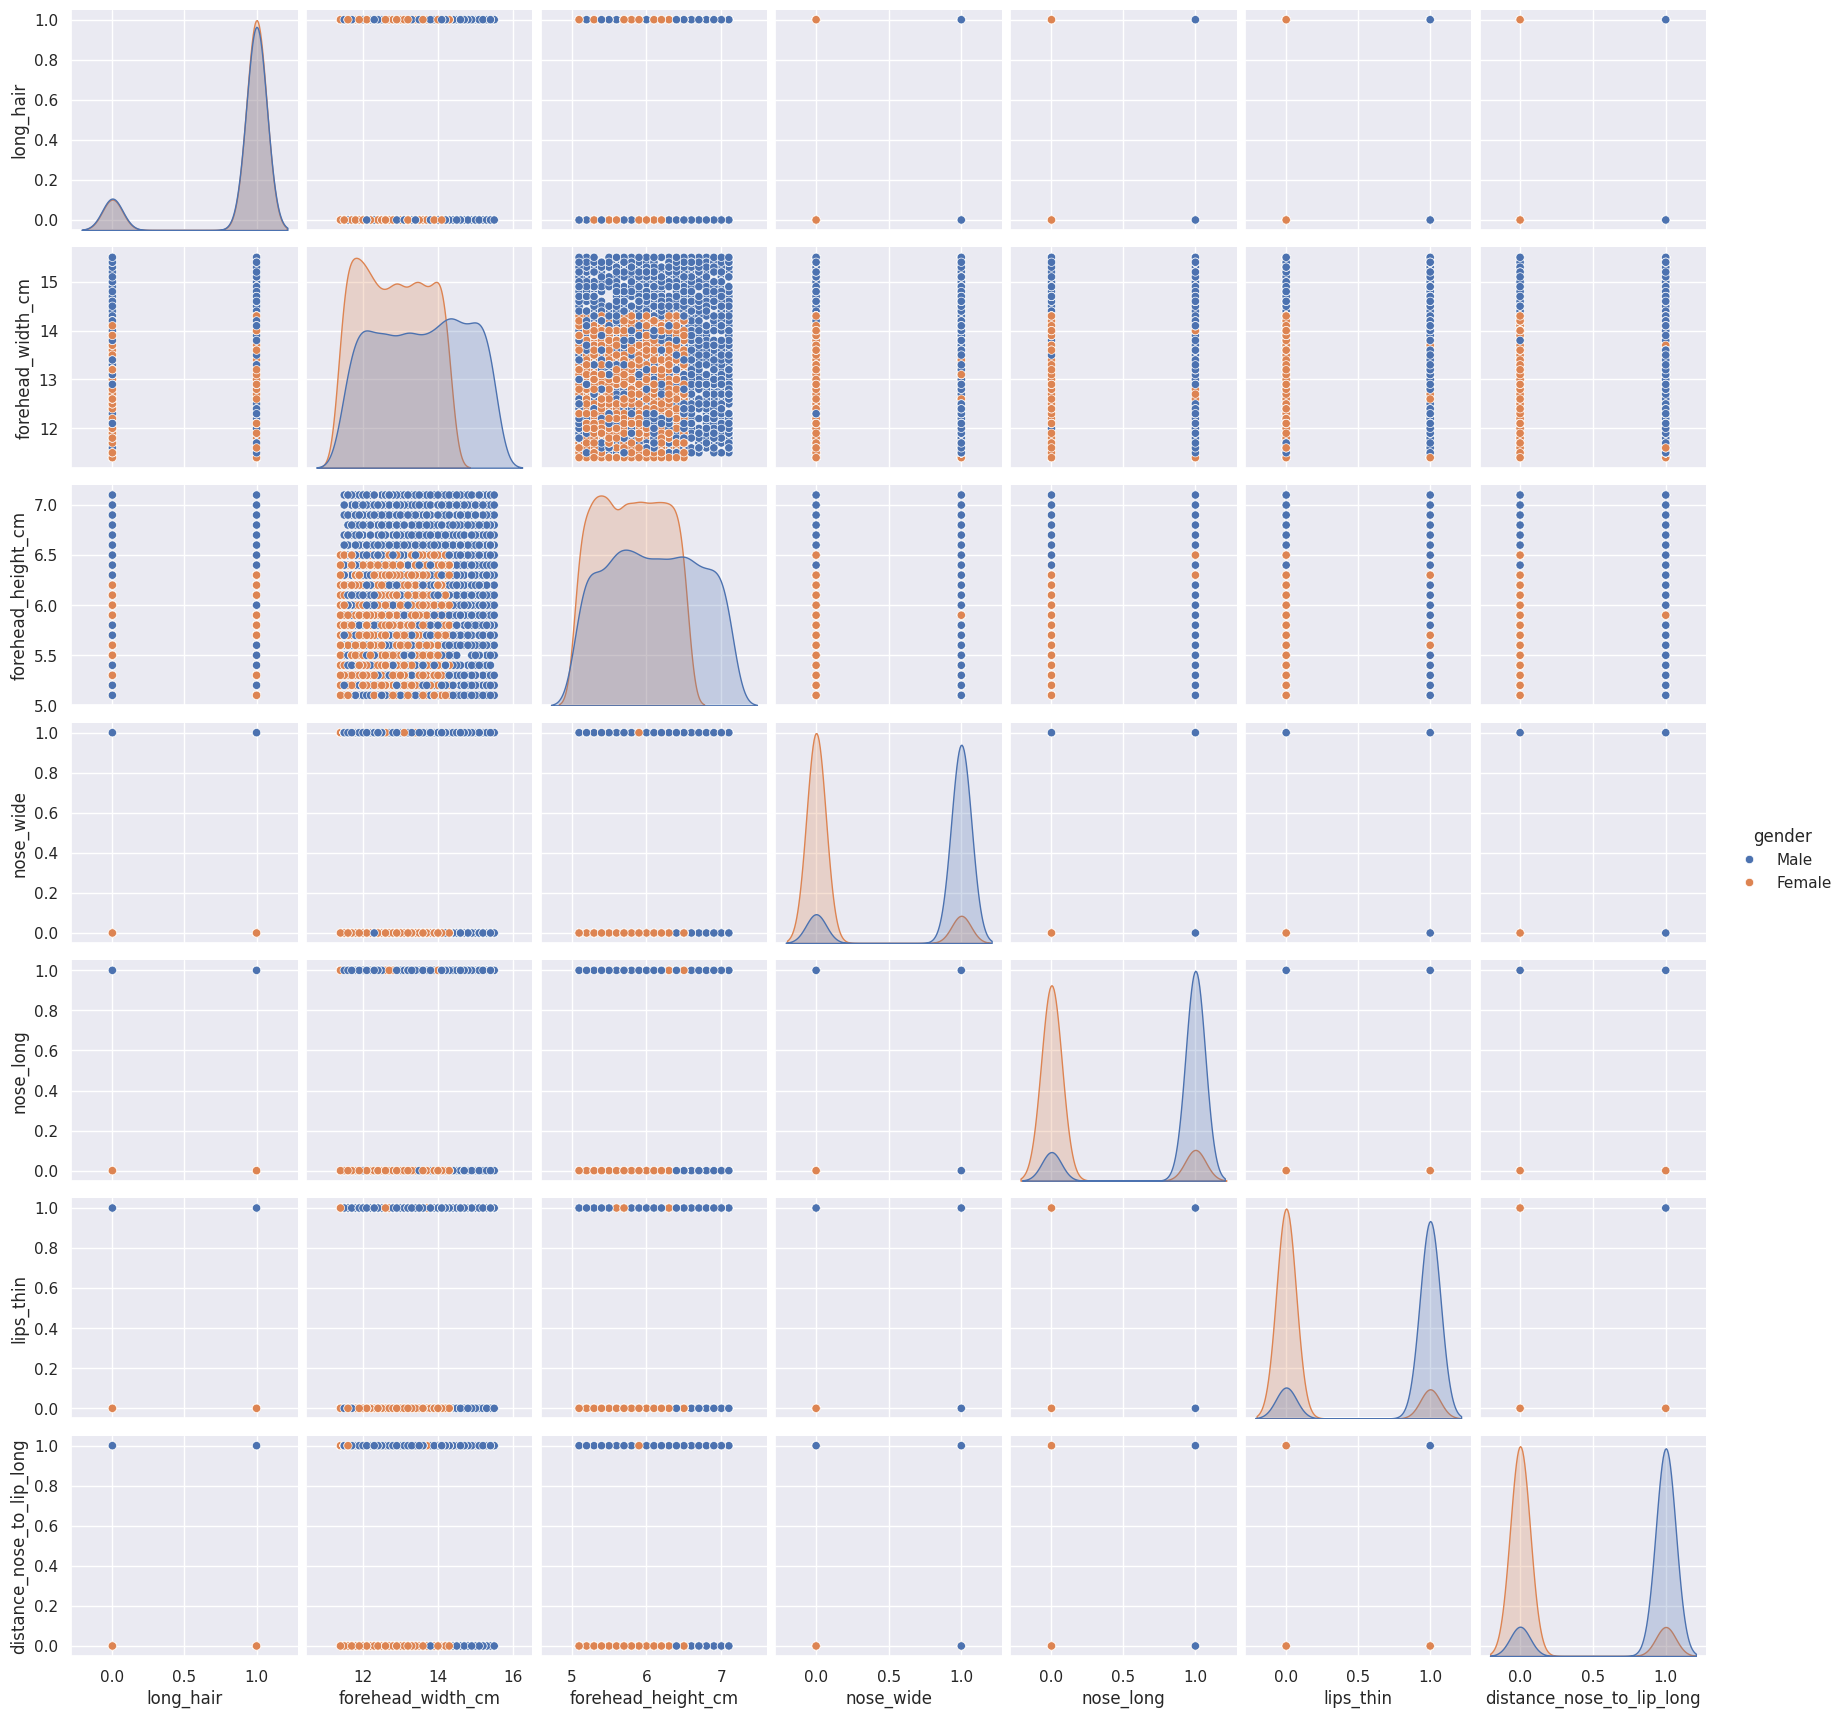

In [100]:
#visualisasi. obat dibedakan berdasarkan gender apakah male atau female
sns.pairplot(gender, vars=['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long'], hue='gender')

Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset gender Viral. Di sini, variabel-variabel yang dipilih untuk dianalisis adalah 'long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long'.

sns.pairplot: Ini adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel.
gender: Merupakan dataset yang digunakan untuk membuat pairplot.
vars: Digunakan untuk menentukan variabel-variabel yang ingin dimunculkan dalam pairplot.
hue='gender': Variabel 'gender' akan digunakan untuk membedakan data. Dalam hal ini, warna plot akan diberikan berdasarkan nilai dari kolom 'gender', yaitu apa gender siswa.
Dengan menggunakan pairplot dan membagi warna berdasarkan 'gender', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada gender siswa. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan gender pada dataset.

In [115]:
# Calculate correlation with the encoded column
correlation_with_gender = numeric_gender.corr()['gender_encoded'].sort_values(ascending=False)

# Display correlation
print(correlation_with_gender)

gender_encoded               1.000000
long_hair                    0.010767
forehead_height_cm          -0.277190
forehead_width_cm           -0.334125
lips_thin                   -0.743319
nose_long                   -0.744147
distance_nose_to_lip_long   -0.754850
nose_wide                   -0.758502
Name: gender_encoded, dtype: float64


output ini adalah nilai korelasi antara variabel 'gender' (kolom target) dengan setiap variabel lain dalam dataset. Nilai korelasi ini berkisar antara -1 hingga 1. sebelum menentukan nilai korelasi dari data

korelasi positif: Nilai korelasi yang mendekati 0 menunjukan bahwa hubungan poitif yang cukup lemah dengan gender, contohnya pada variabel long hair yang memiliki nilai korelasi sebesar 0.010767.

Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Dalam data ini menunjukkan bahwa korelasi 'long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long'memiliki hubungan negatif dengan variabel gender , yang berarti semakin tinggi nilai variabel tersebut maka semakin rendah kemungkinan siswa memiliki gender female (perempuan)

Ringkasnya, nilai korelasi ini membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target 'gender' (male or female). Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan gender perempuan pada dataset.

# MEMISAHKAN VARIABEL X DAN Y

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur wajah) dari variabel dependen (gender) dalam dataset.

Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur wajah. Fitur-fitur ini adalah ciri-ciri atau informasi yang digunakan oleh model untuk melakukan prediksi atau klasifikasi.

Data y (gender /Labels): Merupakan variabel dependen yang ingin diprediksi oleh model. Ini berisi label atau kelas yang ingin diidentifikasi atau diprediksi berdasarkan fitur-fitur yang ada dalam data X.

Pemisahan ini penting karena:

Melatih Model: Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.

Validasi dan Evaluasi: Data y (gender ) dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan target dari fitur-fitur, kita dapat mengevaluasi seberapa baik model dapat memprediksi label yang benar untuk data baru yang belum pernah dilihat sebelumnya.

In [102]:
#memisahkan data menjadi variabel x dan y
X=gender.drop(['gender'], axis=1)
y=gender['gender']

# MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING


Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur wajah(variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.


besarnya pembagian data:

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur wajah atau atribut-atribut dari dataset.(ingat X besar)

y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil)

test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing.

random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.


Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur.
X_test: Data testing untuk fitur-fitur.
y_train: Data training untuk target atau label.
y_test: Data testing untuk target atau label.
Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [104]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[1.         0.04878049 0.3        ... 0.         1.         0.        ]
 [1.         0.51219512 0.25       ... 0.         0.         0.        ]
 [1.         0.75609756 0.6        ... 1.         1.         0.        ]
 ...
 [1.         0.70731707 0.55       ... 1.         0.         0.        ]
 [0.         0.14634146 0.85       ... 1.         1.         1.        ]
 [1.         0.70731707 0.3        ... 0.         0.         0.        ]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train). MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test). Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus: fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

# NAIVE BAYES

In [105]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [106]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [107]:
# menghitung akurasi dari train set
nb.score(X_train, y_train)

0.97275

In [108]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

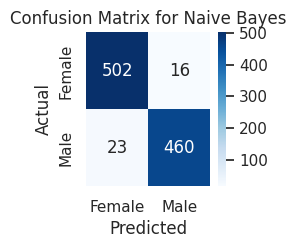

In [132]:
# membuat dan menampilkan confusion matrix
from sklearn.metrics import confusion_matrix  # Make sure confusion_matrix is imported

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb.classes_, yticklabels=nb.classes_)  # Change nb_model to nb
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [128]:
from sklearn.metrics import accuracy_score # Import accuracy_score

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9680


Model Gaussian Naive Bayes telah dilatih menggunakan data training (X_train, y_train) dan menunjukkan hasil akurasi sebesar  0.9680 atau  96.8%. Artinya, model mampu mengklasifikasikan seluruh data training dengan benar. Setelah itu, model diuji menggunakan data uji (X_test), dan hasilnya juga menunjukkan akurasi yang hampir sempurna, yaitu 96.8%. Ini menunjukkan bahwa model berhasil memprediksi hampir seluruh label pada data uji dengan tepat.Secara umum, hasil ini menunjukkan bahwa model Gaussian Naive Bayes memiliki performa yang sangat baik pada dataset gender.

# Proses membuat model dengan K-Nearest Neighbor(KNN)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Tentukan rentang nilai n_neighbors terbaik yang ingin diuji
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Buat objek GridSearchCV
# menentukan KNeighborsClassifier untuk knn
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)  # cv=5 untuk 5-fold cross-validation

# Lakukan pencarian grid pada data pelatihan
grid_search.fit(X_train, y_train)

# Dapatkan nilai n_neighbors terbaik
best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f"Nilai n_neighbors terbaik: {best_n_neighbors}")

Nilai n_neighbors terbaik: 7


dengan menggunakan grid, mencari nilai n_neighbors yang akan diuji. didapatkan nilai n_neighbors terbaik sebesar 7

In [130]:
# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=7)

# Melatih model
knn.fit(X_train, y_train)

# Memprediksi data pengujian
y_pred = knn.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.961038961038961


dengan menggunakan nilai neighbors terbaik, didapatkan akurasi prediksi 0.961038961038961 = 96.1% yang berarti hampir mendekati 100%. karena nilai akurasi dari naive bayes = 96.8% > 96.1% = KNN, sehingga dapat disimpulkan bahwa klasifikasi menggunakan naive bayes lebih baik dari klasifikasi KNN dalam mengklasifikasikan data fitur wajah pada kategori gender seseorang.